# Графики показателей безотказности для различных законов распределения наработки до отказа

Показатели безотказности: $P(t), Q(t), f(t), \lambda(t)$ - представляют собой различные способы описания закона распределения наработки до отказа. Если известна функциональная форма одного из этих показателей, то используя формулы для пересчета, можно найти все остальные показатели. Наиболее полезные формулы представлены ниже.

* связь вероятности отказа и вероятности безотказной работы: $$P(t) = 1 - Q(t) $$
* связь плотности распределения отказов и вероятности отказа: $$Q(t) = \int_0^t f(\tau)d\tau$$ $$f(t) = \frac{dQ(t)}{dt}$$
* связь интенсивности отказов и плотности распределения отказов: $$ \lambda(t) = \frac{f(t)}{P(t)} $$
* связь вероятности безотказной работы и интенсивности отказов: $$ P(t) = e^{-\int_0^t \lambda(\tau) d\tau} $$


## Пример построения графиков показателей безотказности для нормального распределения

Плотность нормального распределения имеет вид:
$$ f(t) = \frac{1}{\sigma \sqrt{2 \pi}}  e^{-\frac{1}{2} \left( \frac{t-a}{\sigma} \right)^2}$$

Аналитический вид интеграла для данной плотности распределения получить невозможно, поэтому для построения графиков показателей надежности необходимо использовать встроенные функции NumPy, позволяющие приближенно вычислить функцию распределения.

Предварительно необходимо подключить библиотеки для математических вычислений и построения графиков.

In [1]:
import matplotlib.pyplot as plt #библиотека для построения графиков
import numpy as np #математическая библиотека для работы с массивами
%matplotlib inline 
#графики будут встраиваться непосредственно на страницу
import scipy.stats as stat #функции для работы с распределениями

In [2]:
#для удобства определим функции, вычисляющие показатели надежности в заданный момент времени t:

def f_n(t, a, sigma): #плотность распределения отказов    
    return stat.norm.pdf(t, loc=a, scale=sigma) #pdf = probability density function (плотность)

def Q_n(t, a, sigma): #вероятность отказа (функция распределения наработки)
    return stat.norm.cdf(t, loc=a, scale=sigma) #cdf = cumulative distribution function (интегральная функция распределения)

def P_n(t, a, sigma): #вероятность безотказной работы
    return 1 - Q_n(t, a, sigma)

def lambda_n(t, a, sigma): #интенсивность отказов
    return f_n(t, a, sigma)/P_n(t, a, sigma)

In [3]:
# Построение графиков показателей безотказности для нормального распределения с параметрами: a = 6000 час, sigma = 500 час
a = 6000 #часов
sigma = 500 #часов

#по правилу 3 сигм, для нормального распределения большинство реализаций случайной величины
# будут не дальше 3 стандартных отклонений от центра распределения
tn = a - 4 * sigma
tk = a + 4 * sigma

t = np.linspace(tn, tk, 200) #пределы для построения графика и число точек, по которым он будет построен
#print(len(t))

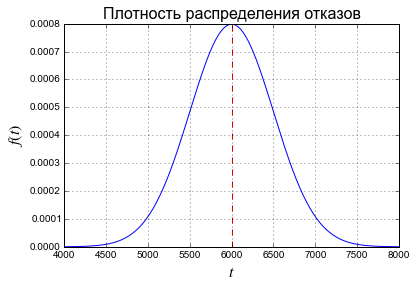

In [4]:
#график плотности распределения наработки
plt.plot(t, f_n(t, a, sigma), color='blue')
plt.axvline(a, linestyle='--', color='red') #добавить вертикальную линию в центре распределения

plt.xlabel(r'$t$', fontsize=16) #метка для оси и размер шрифта
plt.ylabel(r'$f(t)$', fontsize=16) #метка для оси и размер шрифта
#поскольку $ - это специальный символ, необходимо отключить обработку строки, добавив перед ней r (raw string)

plt.title('Плотность распределения отказов', fontsize=16)
plt.grid() #добавляем линии сетки

plt.show() #показать график

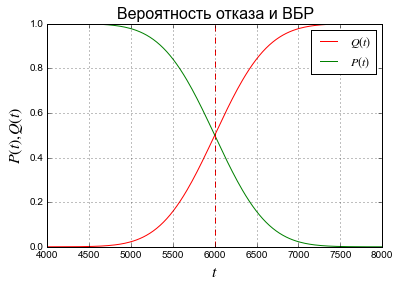

In [5]:
#график вероятности отказа и вероятности безотказной работы
plt.plot(t, Q_n(t, a, sigma), color='red', label=r'$Q(t)$')
plt.plot(t, P_n(t, a, sigma), color='green', label=r'$P(t)$')

plt.axvline(a, linestyle='--', color='red') #добавить вертикальную линию в центре распределения

plt.xlabel(r'$t$', fontsize=16) #метка для оси и размер шрифта
plt.ylabel(r'$P(t), Q(t)$', fontsize=16) #метка для оси и размер шрифта
plt.title('Вероятность отказа и ВБР', fontsize=16)
plt.grid() #добавляем линии сетки
plt.legend(loc='best') #добавляем легенду


plt.show() #показать график

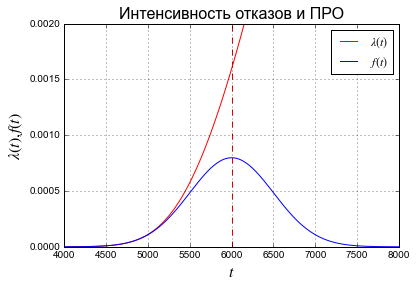

In [6]:
#график интенсивности и плотности отказов
plt.plot(t, lambda_n(t, a, sigma), color='red', label=r'$\lambda(t)$')
plt.plot(t, f_n(t, a, sigma), color='blue', label=r'$f(t)$')

plt.axvline(a, linestyle='--', color='red') #добавить вертикальную линию в центре распределения

plt.xlabel(r'$t$', fontsize=16) #метка для оси и размер шрифта
plt.ylabel(r'$\lambda(t), f(t)$', fontsize=16) #метка для оси и размер шрифта
plt.title('Интенсивность отказов и ПРО', fontsize=16)
plt.grid() #добавляем линии сетки
plt.legend(loc='best') #добавляем легенду

plt.ylim(ymax=0.002) #предел для оси Y
 
plt.show() #показать график

## Построение графиков показателей безотказности для распределения Вейбулла

Распределение Вейбулла позволяет аппроксимировать большое число распределений наработки за счет наличия параметра формы $\alpha$

Формулы для основных показателей надежности при данном распределении имеют вид:
* интенсивность отказов: $$ \lambda(t) = \alpha \lambda t^{\alpha-1} $$
* вероятность безотказной работы: $$ P(t) = e^{-\lambda t^\alpha} $$
* плотность распределения отказов: $$ f(t) = \lambda \alpha t^{\alpha-1} e^{-\lambda t^\alpha} $$

_Необходимо:_

1. Задать функции для вычисления основных показателй безотказности (используя приведенные выше формулы)

1. Построить в одной системе координат графики интенсивности отказов для различных значений параметра формы: $$ \alpha < 1, \alpha = 1,  \alpha >1 $$
1. Построить в одной системе координат графики плотности распределения отказов для различных значений параметра формы: $$ \alpha < 1, \alpha = 1,  \alpha >1 $$
1. Построить в одной системе координат графики вероятности безотказной работы для различных значений параметра формы: $$ \alpha < 1, \alpha = 1,  \alpha >1 $$
1. Построить в одной системе координат графики вероятности отказа для различных значений параметра формы: $$ \alpha < 1, \alpha = 1,  \alpha >1 $$

Значения параметров $\alpha, \lambda$ подберите самостоятельно. При необходимости, подберите пределы для координатных осей.

In [7]:
# Функции для показателей надежности в момент времени t

def lambda_w(t, Lambda, alpha):
    return None #здесь ваш код

#Примечание: в Python зарезервировано ключевое слово: 'lambda', его нельзя использовать для обозначения собственных функций и параметров
#поэтому в списке агрументов функции название параметра указано с заглавной буквы

# для вычисления экспоненты можно использовать функцию np.exp()
# возведение в степень в Python обозначается так: x**a

def f_w(t, Lambda, alpha):
    return None #здесь ваш код


def P_w(t, Lambda, alpha):
    return None #здесь ваш код

def Q_w(t, Lambda, alpha):
    return None #здесь ваш код


In [8]:
# Код для построения графиков